<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/most_popular_authors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to find the Most Popular Authors.
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
- unicodedata

</font>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import unicodedata

<br>
<font size="3"> 
    
After installing and importing everything we need, we will write the functions that we will use in this project.
    
- **plot_barchart:** plots the given dictionary in a bar chart 

</font>
<br>
<br>

In [ ]:
#function to print output from a given dictionary
def plot_barchart(mydict):
    source = []
    count = []

    for w in sorted(mydict, key=mydict.get, reverse=True):
        source.append(w)
        count.append(mydict[w])

    plt.figure(figsize=(20, 5))
    plt.bar(source[0:10], count[0:10])
    plt.title('Bar chart for 10 most popular Authors')
    plt.grid(axis='y')
    plt.show() 

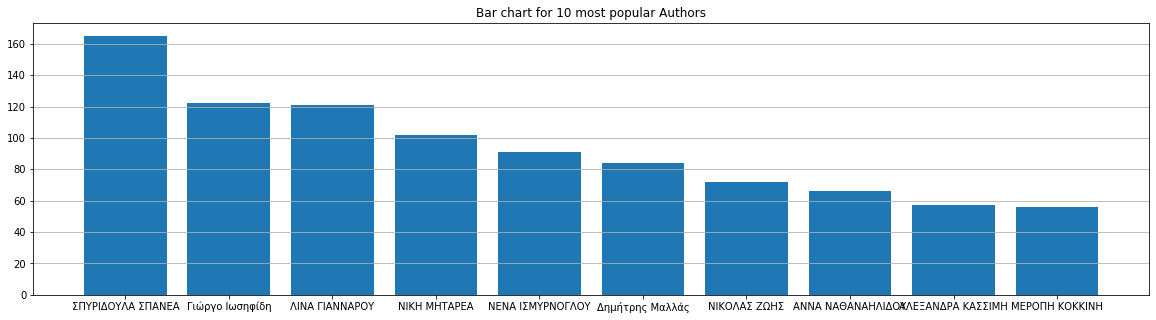

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#get all the authors
authors = list(df['author'])


#we want to find the personal authors not the ones with the sites signature
unique_authors = set(authors)

authors_dict = {k:0 for k in unique_authors}

for x in authors_dict:
    temp =re.search(r'[A-Za-z\.0-9]+|[Α-Ω]+\.[Α-Ω]+\s+|[Α-Ω]+\.[Α-Ω]+\.\s+',x)
    # count only the ones that don't match the above regular expretion 
    if temp == None: 
        count = authors.count(x)
        authors_dict.update({x:count})
    
plot_barchart(authors_dict)